# PCA understanding examples

Most of the codes in this file come from [the slides of Yang](https://note.dinhanhthi.com/files/ml/pca/tutorial4-yang.pdf).

## Load libraries

In [0]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Sample `s` and PCA on `s`

In [2]:
s = np.array([[2.5,2.4], [0.5,0.7], [2.2,2.9],
            [1.9,2.2], [3.1,3.0], [2.3,2.7], [2, 1.6], [1, 1.1],
            [1.5, 1.6], [1.1, 0.9]])
print(s) # n_samples x n_features

[[2.5 2.4]
 [0.5 0.7]
 [2.2 2.9]
 [1.9 2.2]
 [3.1 3. ]
 [2.3 2.7]
 [2.  1.6]
 [1.  1.1]
 [1.5 1.6]
 [1.1 0.9]]


In [3]:
pca = PCA(n_components=1) # to 1D
s1 = pca.fit_transform(s) # fit and apply the dimensionality reduction on s
print(s1) # n_samples x n_components

[[-0.82797019]
 [ 1.77758033]
 [-0.99219749]
 [-0.27421042]
 [-1.67580142]
 [-0.9129491 ]
 [ 0.09910944]
 [ 1.14457216]
 [ 0.43804614]
 [ 1.22382056]]


In [4]:
print (pca.components_) # eigenvectors
print (pca.explained_variance_) # eigenvalues
print (pca.explained_variance_ratio_) 

[[-0.6778734  -0.73517866]]
[1.28402771]
[0.96318131]


## Plot & Choose Principal Components (PC)

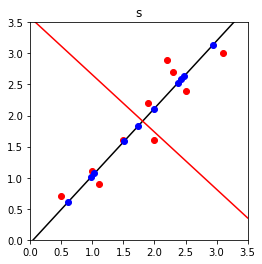

In [5]:
## SETTING UP THE PLOT
plt.xlim(0,3.5)
plt.ylim(0,3.5)
plt.gca().set_aspect('equal', adjustable='box')
# gca = get current axes and set aspect on it
# matplotlib.axes.Axes.set_aspect : the ratio of y-unit to x-unit

## PLOT THE ORIGINAL DATA
plt.title('s')
plt.plot(s[:,0],s[:,1],'ro')

## PRINCIPAL COMPONENTS (PC)
pca1 = PCA(n_components=2)
pca1.fit(s)
x = np.linspace(0, 3.5)
y = pca1.components_[1][0]/pca1.components_[0][0]*x + pca1.mean_[1]-pca1.components_[1][0]/pca1.components_[0][0]*pca1.mean_[0]
plt.plot(x, y, 'k-') # line with eigenvector 1 and go through the mean point
y = pca1.components_[1][1]/pca1.components_[0][1]*x+pca1.mean_[1]-pca1.components_[1][1]/pca1.components_[0][1]*pca1.mean_[0]
plt.plot(x, y,'r-') # line with eigenvector 2 and go through the mean point

## PROJECTION OF PC ON THE "CHOSEN" COMPONENT
c1 = pca.inverse_transform(s1) # transform s1 back to original data space (2D) - NOT BACK TO s!!!
plt.plot(c1[:, 0], c1[:, 1], 'bo')

# Understanding of choosing `n_components` $k$

When choosing the number of principal components (k), we choose k to be the smallest value so that for example, 99% of variance, is retained. [[ref]](https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff)

In [6]:
np.random.seed(0)
my_matrix = np.random.randn(20, 5)

my_model = PCA(n_components=5)
my_model.fit_transform(my_matrix)

print(my_model.explained_variance_)
print(my_model.explained_variance_ratio_)
print(my_model.explained_variance_ratio_.cumsum())

[1.58691121 1.36183634 1.02149516 0.64960702 0.33188507]
[0.32047581 0.27502207 0.20629036 0.13118776 0.067024  ]
[0.32047581 0.59549787 0.80178824 0.932976   1.        ]


So in my random toy data, if I picked `k=4` I would retain `93.3%` of the variance.

# Visualization hand-written digits


## Overview the dataset and plot all digits on 2D plot

In [7]:
from sklearn import datasets

# load the handwriting data from the database
digits = datasets.load_digits()

print (digits.keys())
print (digits.data.shape)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
(1797, 64)


In [0]:
X,y = digits.data, digits.target
pca = PCA(n_components=2)
#reduce the features to 2 components
X_proj = pca.fit_transform(X)

In [13]:
print(np.sum(pca.explained_variance_ratio_))

0.2850936482367288


**Comment:** Only retain about 28% of the variance by 2 PC

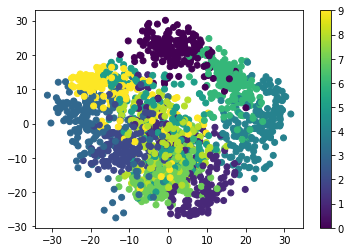

In [12]:
plt.scatter(X_proj[:,0], X_proj[:,1], c=y)
plt.colorbar()
plt.show()

## Only number 1 or 8?

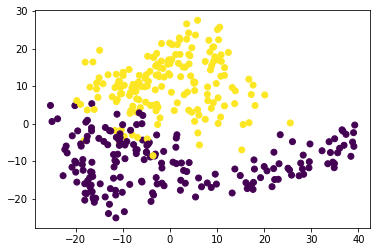

In [15]:
X_18 = X[np.logical_or(y==1,y==8), :]
y_18 = y[np.logical_or(y==1,y==8)]
X_18pj = pca.fit_transform(X_18)
plt.scatter(X_18pj[:,0], X_18pj[:,1], c=y_18)
plt.show()

## Using SVM to classifier data in the case of 1 & 8

Check out [my note](https://note.dinhanhthi.com/support-vector-machine) for SVM.

In [22]:
from sklearn import svm, model_selection
clf = svm.SVC(kernel='rbf', gamma=0.001)

scores = model_selection.cross_val_score(clf, X_18pj, y_18, cv=6)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.93 (+/- 0.08)


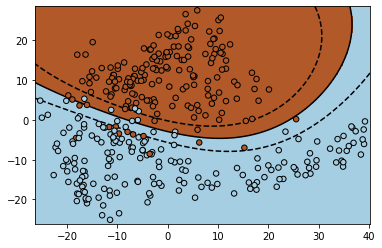

In [25]:
clf.fit(X_18pj, y_18)
plt.scatter(X_18pj[:, 0], X_18pj[:, 1], c=y_18, zorder=10, cmap=plt.cm.Paired, edgecolor='k', s=30)

x_min, x_max = X_18pj[:, 0].min()-1, X_18pj[:, 0].max()+1
y_min, y_max= X_18pj[:, 1].min()-1, X_18pj[:, 1].max()+1

# Create a mesh to plot in
xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z>0, cmap=plt.cm.Paired)
plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-0.5, 0, 0.5])
plt.show()

Another way to plot the decision boundaries (from [this](https://note.dinhanhthi.com/files/ml/svm/svm-xor-rbf-kernel-parameters)). We construct a function to do that.

In [0]:
from matplotlib.colors import ListedColormap

def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    alpha=1.0,
                    c='',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')


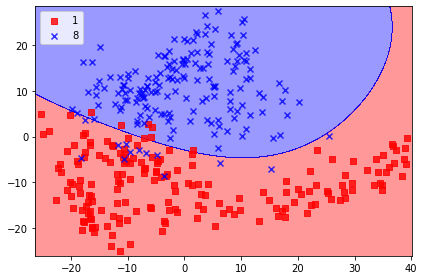

In [30]:
# reset to do in another way
clf = svm.SVC(kernel='rbf', gamma=0.001)
clf.fit(X_18pj, y_18)
plot_decision_regions(X_18pj, y_18, classifier=clf)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()